<a href="https://colab.research.google.com/github/kazuma313/LicensePlateRecognition/blob/main/LicensePlateRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create BaseLine


## Get Data

In [ ]:
!wget https://github.com/kazuma313/LicensePlateRecognition/archive/refs/heads/main/dataset.zip

--2023-10-26 23:01:30--  https://github.com/kazuma313/LicensePlateRecognition/archive/refs/heads/main/dataset.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/kazuma313/LicensePlateRecognition/zip/refs/heads/main [following]
--2023-10-26 23:01:30--  https://codeload.github.com/kazuma313/LicensePlateRecognition/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dataset.zip’

dataset.zip             [    <=>             ]  23.26M  22.3MB/s    in 1.0s    

2023-10-26 23:01:31 (22.3 MB/s) - ‘dataset.zip’ saved [24392380]



In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
2953fc7bf4723a3744be2aa912b18b454edebfc2
   creating: LicensePlateRecognition-main/
  inflating: LicensePlateRecognition-main/LicensePlateRecognition.ipynb  
 extracting: LicensePlateRecognition-main/README.md  
   creating: LicensePlateRecognition-main/dataset/
   creating: LicensePlateRecognition-main/dataset/platGray/
  inflating: LicensePlateRecognition-main/dataset/platGray/E1129RP.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1169PY.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1245RG.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1267RB.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1477RB.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1677PE.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1707PH.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1893PQ.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1992RN.jpg 

## Visualize random data

In [ ]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title("folder name : {}\n file name: {}".format(target_class, random_image[0]))
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (416, 416, 3)


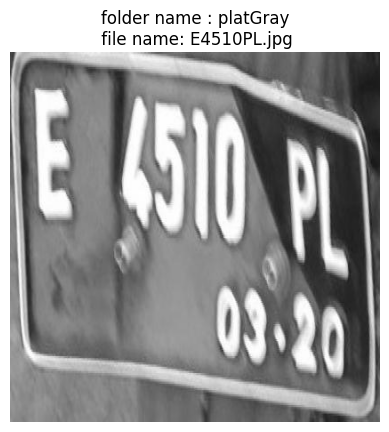

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/LicensePlateRecognition-main/dataset/",
                        target_class="platGray")

## preprocessing

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

import tensorflow as tf

In [3]:
print(tf.__version__)

2.14.0


In [ ]:
dataset, vocab, max_len = [], set(), 0

In [ ]:
data_dir = os.path.join("LicensePlateRecognition-main", "dataset", "platGray")

In [ ]:
for file in os.listdir(data_dir):
  file_path = os.path.join(data_dir, file)
  label = os.path.splitext(file)[0]
  max_len = max(max_len, len(label))
print(max_len)

8


In [ ]:
X, y, labels = [], [], []
for file in os.listdir(data_dir):
  file_path = os.path.join(data_dir, file)
  label = os.path.splitext(file)[0]
  # img = cv2.imread(file_path)
  # X.append(img)
  X.append(file_path)

  while len(label) != max_len:
    label += " "
  y.append(list(label))
  # dataset.append([file_path, label])
  labels.append(label)
  # vocab.update(list(label))


In [5]:
base_character = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 ")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(base_character)
print(le.classes_)



[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y'
 'Z']


In [7]:
import pickle

In [16]:
import pickle
print(pickle.__version__)

AttributeError: ignored

In [8]:
pickle.dump(le, open("labelEncoder.sav", 'wb'))

In [9]:
loaded_model_le = pickle.load(open("labelEncoder.sav", "rb"))

In [10]:
print(loaded_model_le.classes_)

[' ' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y'
 'Z']


In [13]:
loaded_model_le.transform(['A'])

array([11])

In [ ]:
y = np.array([le.transform(i) for i in y])

In [ ]:
def preprocess_img(image_path):
    img = tf.io.read_file(image_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # print(img)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [224, 224])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    # img = tf.transpose(img, perm=[1, 0, 2])

    return img

In [ ]:
img_test = preprocess_img(X[0]).numpy()

In [ ]:
(thresh, img_plate_bw) = cv2.threshold(img_test, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

error: ignored

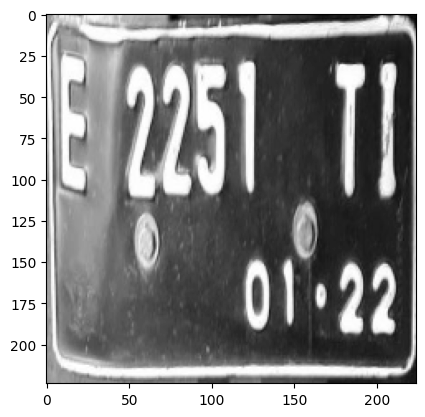

In [ ]:
plt.imshow(preprocess_img(X[0]), cmap="gray")

In [ ]:
preprocess_img(X[0]).numpy()

array([[[0.59655863],
        [0.6128051 ],
        [0.6134454 ],
        ...,
        [0.09499765],
        [0.09947999],
        [0.08035222]],

       [[0.6188876 ],
        [0.6264906 ],
        [0.61112446],
        ...,
        [0.11372519],
        [0.10044062],
        [0.09067616]],

       [[0.6156863 ],
        [0.6344138 ],
        [0.6128852 ],
        ...,
        [0.07995185],
        [0.10684265],
        [0.09547835]],

       ...,

       [[0.6039216 ],
        [0.61008406],
        [0.62472993],
        ...,
        [0.14013588],
        [0.14045605],
        [0.13813542]],

       [[0.605122  ],
        [0.60928375],
        [0.6218488 ],
        ...,
        [0.1421369 ],
        [0.14149666],
        [0.13661462]],

       [[0.60784316],
        [0.6089636 ],
        [0.6184875 ],
        ...,
        [0.13725491],
        [0.13725491],
        [0.14117648]]], dtype=float32)

In [ ]:
imgs = []
for img_path in X:
    imgs.append(preprocess_img(img_path))

In [ ]:
imgs[0]

<tf.Tensor: shape=(224, 224, 1), dtype=float32, numpy=
array([[[0.59655863],
        [0.6188876 ],
        [0.6156863 ],
        ...,
        [0.6039216 ],
        [0.605122  ],
        [0.60784316]],

       [[0.6128051 ],
        [0.6264906 ],
        [0.6344138 ],
        ...,
        [0.61008406],
        [0.60928375],
        [0.6089636 ]],

       [[0.6134454 ],
        [0.61112446],
        [0.6128852 ],
        ...,
        [0.62472993],
        [0.6218488 ],
        [0.6184875 ]],

       ...,

       [[0.09499765],
        [0.11372519],
        [0.07995185],
        ...,
        [0.14013588],
        [0.1421369 ],
        [0.13725491]],

       [[0.09947999],
        [0.10044062],
        [0.10684265],
        ...,
        [0.14045605],
        [0.14149666],
        [0.13725491]],

       [[0.08035222],
        [0.09067616],
        [0.09547835],
        ...,
        [0.13813542],
        [0.13661462],
        [0.14117648]]], dtype=float32)>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(imgs, y, test_size=0.1, random_state=22)

In [ ]:
np.shape(X_train), np.shape(X_test)

((333, 224, 224, 1), (38, 224, 224, 1))

In [ ]:
def convert_to_dict(img, label):
    return {"image": img, "label": label}

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = (
    train_dataset.map(
        convert_to_dict, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(32)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = (
    val_dataset.map(
        convert_to_dict, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(32)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

## Build Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred




In [ ]:

def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(224, 224, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((224 // 4), (224 // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(base_character) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 224, 224, 32)         320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 112, 112, 32)         0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 112, 112, 64)         18496     ['pool1[0][0]']               
                                                                                       

In [ ]:
epochs = 100
early_stopping_patience = 20
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

chackpoint_path= "checkpoint_weight/checkpoint.ckpt"

checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath=chackpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,

                                                        save_freq="epoch",
                                                        verbose=1)


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, checkpoint_callback],
)

Epoch 1/100
10/11 [==========================>...] - ETA: 0s - loss: 64.3213
Epoch 1: val_loss improved from inf to 34.84767, saving model to checkpoint_weight/checkpoint.ckpt
11/11 [==============================] - 12s 302ms/step - loss: 63.0805 - val_loss: 34.8477
Epoch 2/100
10/11 [==========================>...] - ETA: 0s - loss: 30.0690
Epoch 2: val_loss improved from 34.84767 to 28.44091, saving model to checkpoint_weight/checkpoint.ckpt
11/11 [==============================] - 1s 76ms/step - loss: 29.9933 - val_loss: 28.4409
Epoch 3/100
10/11 [==========================>...] - ETA: 0s - loss: 27.3477
Epoch 3: val_loss improved from 28.44091 to 26.61436, saving model to checkpoint_weight/checkpoint.ckpt
11/11 [==============================] - 1s 70ms/step - loss: 27.3191 - val_loss: 26.6144
Epoch 4/100
10/11 [==========================>...] - ETA: 0s - loss: 26.2817
Epoch 4: val_loss improved from 26.61436 to 25.92509, saving model to checkpoint_weight/checkpoint.ckpt
11/11 [==

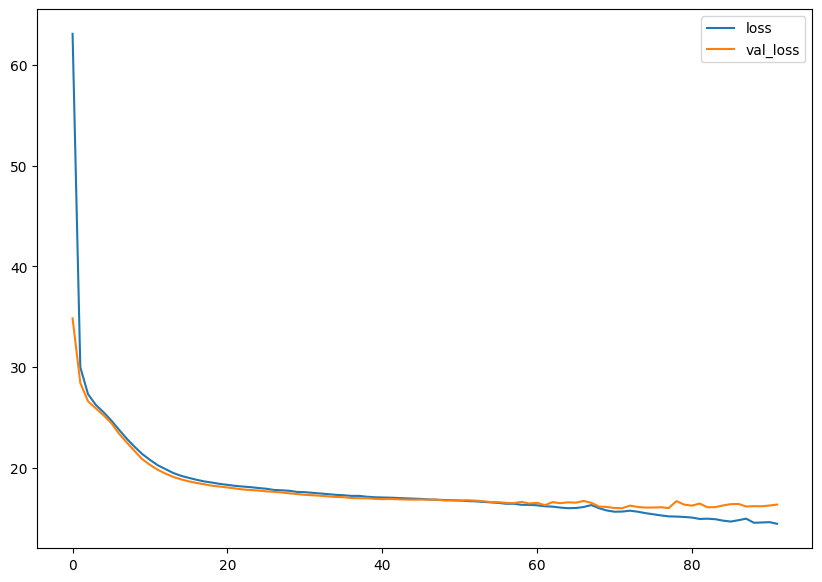

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

## Save Model

In [ ]:
model.save("model_LPR")

In [ ]:
!zip -r model_LPR2.zip model_LPR/
from google.colab import files
files.download("model_LPR2.zip")

  adding: model_LPR/ (stored 0%)
  adding: model_LPR/variables/ (stored 0%)
  adding: model_LPR/variables/variables.index (deflated 68%)
  adding: model_LPR/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: model_LPR/keras_metadata.pb (deflated 93%)
  adding: model_LPR/assets/ (stored 0%)
  adding: model_LPR/fingerprint.pb (stored 0%)
  adding: model_LPR/saved_model.pb (deflated 90%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.load_weights("/content/model_LPR")

In [ ]:
!unzip /content/model_LPR1.zip

Archive:  /content/model_LPR1.zip
   creating: model_LPR/
   creating: model_LPR/variables/
  inflating: model_LPR/variables/variables.index  
  inflating: model_LPR/variables/variables.data-00000-of-00001  
 extracting: model_LPR/fingerprint.pb  
   creating: model_LPR/assets/
  inflating: model_LPR/saved_model.pb  
  inflating: model_LPR/keras_metadata.pb  


In [ ]:
loaded_model = keras.models.load_model("/content/model_LPR")

### predict using loaded model

In [ ]:
prediction_model_loaded = keras.models.Model(
    loaded_model.get_layer(name="image").input, loaded_model.get_layer(name="dense2").output
)


In [ ]:
def predict_image(image, model):
  pred = model.predict(tf.expand_dims(image, axis=0))
  input_len = np.ones(pred.shape[0]) * pred.shape[1]
  results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_len]
  results = np.squeeze(results)
  convert_result = np.array([le.inverse_transform([i]) for i in results if i != -1])

  return np.squeeze(convert_result)

In [ ]:
img_test = preprocess_img("/content/LicensePlateRecognition-main/dataset/platGray/E1477RB.jpg")

In [ ]:
predict_image(img_test, prediction_model_loaded)

1/1 [==============================] - 3s 3s/step


array(['1', '0'], dtype='<U1')

## Predict

In [ ]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
# prediction_model.summary()

In [ ]:
for batch in val_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]
    # print(batch_images.shape)
    pred = prediction_model.predict(batch_images)
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    print(input_len)

    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_len]
    print(results)

1/1 [==============================] - 1s 1s/step
[56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56.
 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56.]
tf.Tensor(
[[15  7 26 11  0 -1 -1 -1]
 [15  4 29 11  0 -1 -1 -1]
 [15  4 26 11  0 -1 -1 -1]
 [15  6 27 11  0 -1 -1 -1]
 [15  4 27 11  0 -1 -1 -1]
 [15  7 26 11  0 -1 -1 -1]
 [15  6 27 11  0 -1 -1 -1]
 [15  4 30 11  0 -1 -1 -1]
 [15  4 29 22  0 -1 -1 -1]
 [15  7 30  0 -1 -1 -1 -1]
 [15  7 29 22  0 -1 -1 -1]
 [15  5 29 22  0 -1 -1 -1]
 [15  7 26 11  0 -1 -1 -1]
 [15  5 27 11  0 -1 -1 -1]
 [15  4 30 11  0 -1 -1 -1]
 [15  6 27 11  0 -1 -1 -1]
 [15  5 29 11  0 -1 -1 -1]
 [15  3 30  0 -1 -1 -1 -1]
 [15  5 29 22  0 -1 -1 -1]
 [15  7 30  0 -1 -1 -1 -1]
 [15  7 26 11  0 -1 -1 -1]
 [15  7 30  0 -1 -1 -1 -1]
 [15  3 26 11  0 -1 -1 -1]
 [15  4 30  0 -1 -1 -1 -1]
 [15  7 27 11  0 -1 -1 -1]
 [15  7 26 11  0 -1 -1 -1]
 [15  5 30  0 -1 -1 -1 -1]
 [15  7 27 22  0 -1 -1 -1]
 [15  7 27 22  0 -1 -1 -1]
 [15  7 26 11  0 -1 -1 -1

In [ ]:
batch_images.shape

TensorShape([32, 224, 224, 1])

In [ ]:
batch_images[2].shape

TensorShape([224, 224, 1])

In [ ]:
pred = prediction_model.predict(tf.expand_dims(batch_images[20], axis=0))
input_len = np.ones(pred.shape[0]) * pred.shape[1]

results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_len]
print(results)

1/1 [==============================] - 1s 1s/step
tf.Tensor([[15  7 26 11  0 -1 -1 -1]], shape=(1, 8), dtype=int64)


In [ ]:

results = np.squeeze(results)
convert_result = np.array([le.inverse_transform([i]) for i in results if i != -1])
print(np.squeeze(convert_result))

['E' '6' 'P' 'A' ' ']


In [ ]:
img = (batch_images[20, :, :, 0] * 255).numpy().astype(np.uint8).T
img

array([[235, 240, 243, ...,  76,  73,  83],
       [210, 208, 208, ...,  76,  74,  77],
       [155, 149, 146, ...,  76,  75,  73],
       ...,
       [241, 240, 244, ...,  69,  72,  79],
       [238, 242, 241, ...,  70,  72,  80],
       [234, 244, 239, ...,  71,  73,  80]], dtype=uint8)

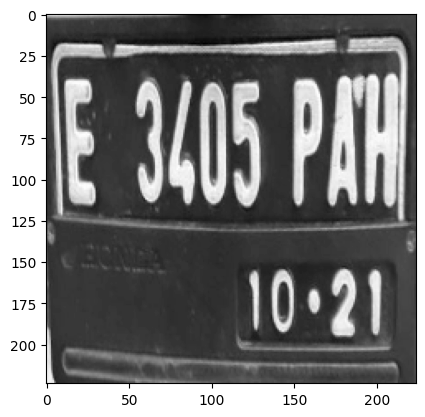

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")

### Note
**Pada iterasi ke 60, tahap training mulai terjadi overfitting. perlu antisipasi untuk hal tersebut**

### predict one testing image

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# train_dataset = (
#     train_dataset.map(
#         convert_to_dict, num_parallel_calls=tf.data.AUTOTUNE
#     )
#     .batch(32)
#     .prefetch(buffer_size=tf.data.AUTOTUNE)
# )

In [ ]:
img_test = preprocess_img("/content/LicensePlateRecognition-main/dataset/platGray/E1677PE.jpg")

In [ ]:
pred_test = prediction_model.predict(tf.expand_dims(img_test, axis=0))

1/1 [==============================] - 0s 24ms/step


In [ ]:
input_len = np.ones(pred_test.shape[0]) * pred_test.shape[1]

results = keras.backend.ctc_decode(pred_test, input_length=input_len, greedy=True)[0][0][:, :max_len]
print(results)
results = np.squeeze(results)
convert_result = np.array([le.inverse_transform([i]) for i in results if i != -1])
print(np.squeeze(convert_result))

tf.Tensor([[15 29 11  0 -1 -1 -1 -1]], shape=(1, 8), dtype=int64)
['E' 'S' 'A' ' ']


In [ ]:
predict_image(img_test, model)

# Add Data Augmentation

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = Sequential([
  layers.RandomRotation(0.2),
  layers.RandomBrightness(0.2),
  layers.RandomContrast(0.2)
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [ ]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(224, 224, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    augmented = data_augmentation(input_img)
    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(augmented)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((224 // 4), (224 // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(base_character) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model2 = build_model()
model2.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 224, 224, 1)          0         ['image[0][0]']               
 ial)                                                                                             
                                                                                                  
 Conv1 (Conv2D)              (None, 224, 224, 32)         320       ['data_augmentation[0][0]']   
                                                                                                  
 pool1 (MaxPooling2D)        (None, 112, 112, 32)         0         ['Conv1[0][0]']    

In [ ]:
# Train the model
history2 = model2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[early_stopping, checkpoint_callback],
)

Epoch 1/200
10/11 [==========================>...] - ETA: 0s - loss: 55.7342
Epoch 1: val_loss did not improve from 16.38856
11/11 [==============================] - 4s 416ms/step - loss: 54.8265 - val_loss: 34.9960
Epoch 2/200
10/11 [==========================>...] - ETA: 0s - loss: 28.6846
Epoch 2: val_loss did not improve from 16.38856
11/11 [==============================] - 1s 69ms/step - loss: 28.6483 - val_loss: 27.4196
Epoch 3/200
10/11 [==========================>...] - ETA: 0s - loss: 26.5393
Epoch 3: val_loss did not improve from 16.38856
11/11 [==============================] - 1s 65ms/step - loss: 26.5239 - val_loss: 26.4220
Epoch 4/200
10/11 [==========================>...] - ETA: 0s - loss: 25.6449
Epoch 4: val_loss did not improve from 16.38856
11/11 [==============================] - 1s 65ms/step - loss: 25.6309 - val_loss: 25.6457
Epoch 5/200
10/11 [==========================>...] - ETA: 0s - loss: 24.8130
Epoch 5: val_loss did not improve from 16.38856
11/11 [=======

<Axes: >

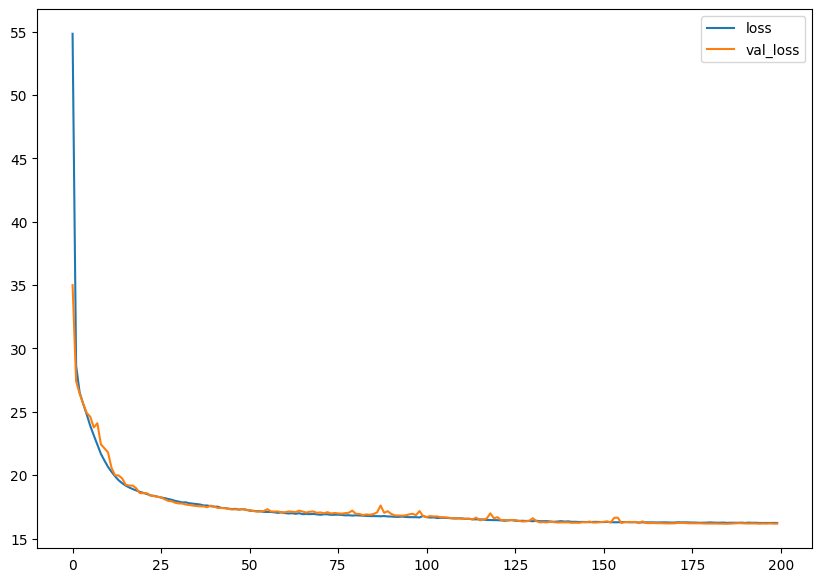

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10, 7))

### Predict

In [ ]:
prediction_model2 = keras.models.Model(
    model2.get_layer(name="image").input, model2.get_layer(name="dense2").output
)
# prediction_model.summary()

In [ ]:
for batch in val_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]
    # print(batch_images.shape)
    pred = prediction_model2.predict(batch_images)
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    print(input_len)

    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_len]
    print(results)

1/1 [==============================] - 4s 4s/step
[56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56.
 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56.]
tf.Tensor(
[[15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 30 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  6 29 11  0 -1 -1 -1

Hmm.. tapi terjadi deteksi yang sama pada data. hal ini mungkin dikarenakan dataset yang terlalu sedikit

## Add layer

In [ ]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(224, 224, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    augmented = data_augmentation(input_img)
    # First conv block
    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1",)(augmented)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2",)(x)

    # third conv block
    x = layers.Conv2D(128,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv3",)(x)

    # forth conv block
    x = layers.Conv2D(256,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv4",)(x)

    x = keras.layers.BatchNormalization(name='bn_3')(x)

    x = layers.MaxPooling2D((2, 2), name="pool2")(x)




    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((224 // 4), (224 // 4) * 256)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(base_character) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model3 = build_model()
model3.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 224, 224, 1)          0         ['image[0][0]']               
 ial)                                                                                             
                                                                                                  
 Conv1 (Conv2D)              (None, 224, 224, 32)         320       ['data_augmentation[10][0]']  
                                                                                                  
 pool1 (MaxPooling2D)        (None, 112, 112, 32)         0         ['Conv1[0][0]']    

In [ ]:
# Train the model
history3 = model3.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, checkpoint_callback],
)

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 69.0145
Epoch 1: val_loss did not improve from 16.68047
11/11 [==============================] - 21s 611ms/step - loss: 69.0145 - val_loss: 34.5258
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 30.5008
Epoch 2: val_loss did not improve from 16.68047
11/11 [==============================] - 2s 227ms/step - loss: 30.5008 - val_loss: 27.5928
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 27.1149
Epoch 3: val_loss did not improve from 16.68047
11/11 [==============================] - 2s 205ms/step - loss: 27.1149 - val_loss: 26.7364
Epoch 4/100
11/11 [==============================] - ETA: 0s - loss: 26.1985
Epoch 4: val_loss did not improve from 16.68047
11/11 [==============================] - 2s 208ms/step - loss: 26.1985 - val_loss: 26.2409
Epoch 5/100
11/11 [==============================] - ETA: 0s - loss: 25.5140
Epoch 5: val_loss did not improve from 16.68047
11/11 [===

<Axes: >

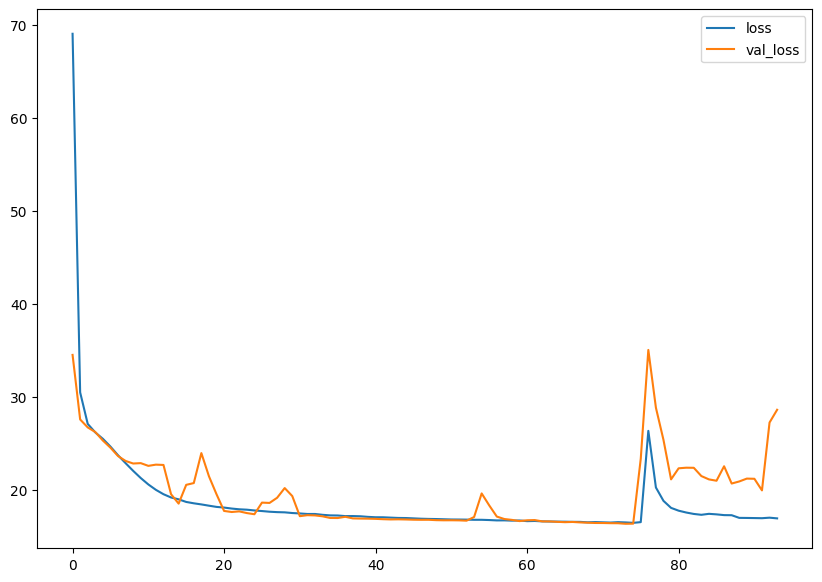

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(10, 7))

layer yang ditambahkan membuat val_loss tidak stabil

In [ ]:
model3.load_weights("checkpoint_weight/checkpoint.ckpt")

In [ ]:
model3

In [ ]:
prediction_model = keras.models.Model(
    model3.get_layer(name="image").input, model3.get_layer(name="dense2").output
)
# prediction_model.summary()

In [ ]:
for batch in val_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]
    # print(batch_images.shape)
    pred = prediction_model.predict(batch_images)
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    print(input_len)

    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_len]
    print(results)

1/1 [==============================] - 2s 2s/step
[56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56.
 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56. 56.]
tf.Tensor(
[[15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1]
 [15  7 29 11  0 -1 -1 -1

# Keras-OCR

In [ ]:
!pip install keras-ocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 995.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

import keras_ocr



Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [ ]:
img = cv2.imread("/content/LicensePlateRecognition-main/dataset/platGray/E1129RP.jpg")

In [ ]:
from google.colab.patches import cv2_imshow

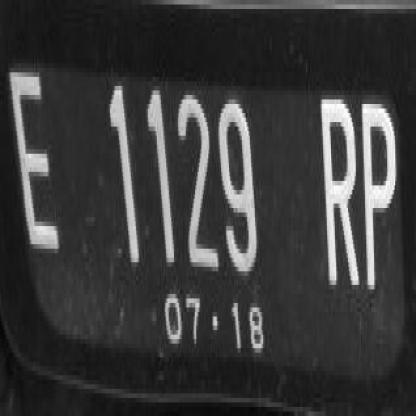

In [ ]:
cv2_imshow(img)

In [ ]:
import string
alphabet = string.ascii_uppercase+string.digits
alphabet

'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

In [ ]:
recognizer_alphabet = ''.join(sorted(set(alphabet)))
recognizer_alphabet

'0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [ ]:

pipeline = keras_ocr.pipeline.Pipeline(recognizer=recognizer)

Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [ ]:
# Get a set of three example images

pipeline = keras_ocr.pipeline.Pipeline(recognizer=recognizer)
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize([img])



Looking for /root/.keras-ocr/craft_mlt_25k.h5
1/1 [==============================] - 11s 11s/step


1/1 [==============================] - 3s 3s/step


In [ ]:
prediction_groups[0]

[('GWJWTJO5',
  array([[  8.793186,  92.736465],
         [ 46.856243,  88.65828 ],
         [ 62.643124, 236.00255 ],
         [ 24.580067, 240.08073 ]], dtype=float32)),
 ('4G4J4W40XJ815',
  array([[102.,  92.],
         [262.,  92.],
         [262., 267.],
         [102., 267.]], dtype=float32)),
 ('4G4MJM285',
  array([[321.     , 102.     ],
         [399.     , 102.     ],
         [399.     , 276.99997],
         [321.     , 276.99997]], dtype=float32)),
 ('G059R0XXG5',
  array([[161., 294.],
         [226., 294.],
         [226., 343.],
         [161., 343.]], dtype=float32)),
 ('G0G5I50X0G5',
  array([[227., 303.],
         [267., 303.],
         [267., 350.],
         [227., 350.]], dtype=float32))]

In [ ]:
import matplotlib.pyplot as plt


<Axes: >

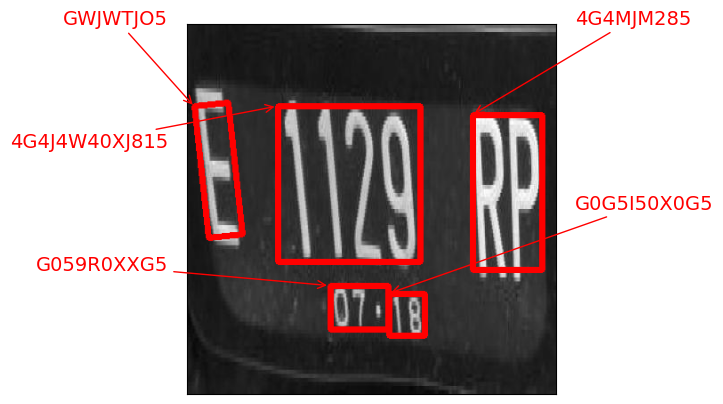

In [ ]:
keras_ocr.tools.drawAnnotations(plt.imread("/content/LicensePlateRecognition-main/dataset/platGray/E1129RP.jpg"), prediction_groups[0])

### Tanpa paramter

In [ ]:
pipeline2 = keras_ocr.pipeline.Pipeline()
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline2.recognize([img])
prediction_groups

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 3s 3s/step


[[('i',
   array([[  8.793186,  92.736465],
          [ 46.856243,  88.65828 ],
          [ 62.643124, 236.00255 ],
          [ 24.580067, 240.08073 ]], dtype=float32)),
  ('lz',
   array([[102.,  92.],
          [262.,  92.],
          [262., 267.],
          [102., 267.]], dtype=float32)),
  ('r',
   array([[321.     , 102.     ],
          [399.     , 102.     ],
          [399.     , 276.99997],
          [321.     , 276.99997]], dtype=float32)),
  ('071',
   array([[161., 294.],
          [226., 294.],
          [226., 343.],
          [161., 343.]], dtype=float32)),
  ('18',
   array([[227., 303.],
          [267., 303.],
          [267., 350.],
          [227., 350.]], dtype=float32))]]

<Axes: >

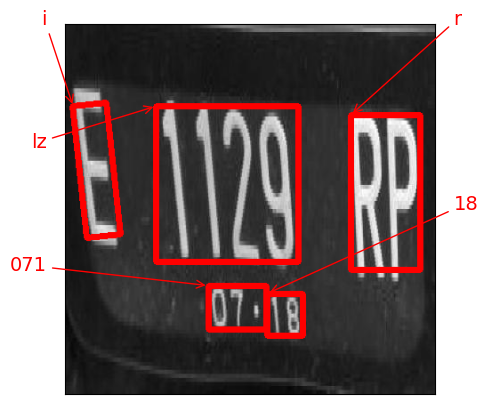

In [ ]:
keras_ocr.tools.drawAnnotations(plt.imread("/content/LicensePlateRecognition-main/dataset/platGray/E1129RP.jpg"),prediction_groups[0])

### Coba binnary image

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray

array([[32, 32, 31, ..., 91, 89, 88],
       [32, 32, 31, ..., 91, 89, 88],
       [32, 32, 31, ..., 91, 89, 88],
       ...,
       [37, 36, 34, ..., 36, 37, 37],
       [38, 36, 34, ..., 36, 36, 36],
       [38, 36, 34, ..., 35, 35, 35]], dtype=uint8)

In [ ]:
(thresh, img_plate_bw) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

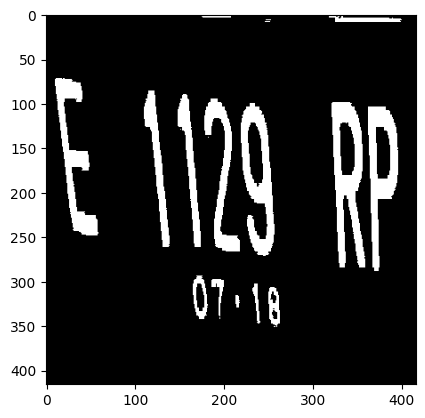

In [ ]:
plt.imshow(img_plate_bw, cmap="gray")

In [ ]:
RGB_img = cv2.cvtColor(img_plate_bw, cv2.COLOR_GRAY2RGB)


In [ ]:
prediction_groups = pipeline.recognize([RGB_img])
prediction_groups

1/1 [==============================] - 3s 3s/step


[[('AP4E49',
   array([[ -0.30444336,  98.0285    ],
          [ 43.972633  ,  88.86774   ],
          [ 72.33752   , 225.96466   ],
          [ 28.06044   , 235.12543   ]], dtype=float32)),
  ('APL4O4E9E9',
   array([[ 99.,  91.],
          [262.,  91.],
          [262., 264.],
          [ 99., 264.]], dtype=float32)),
  ('AOPO4E9E9',
   array([[322.4127 , 107.20686],
          [401.62057, 109.76196],
          [396.38565, 272.04468],
          [317.17776, 269.4896 ]], dtype=float32)),
  ('A4D4E1R1IGYG49',
   array([[161.96454, 292.56326],
          [269.3214 , 301.61746],
          [265.05664, 352.18552],
          [157.69977, 343.13132]], dtype=float32))]]

<Axes: >

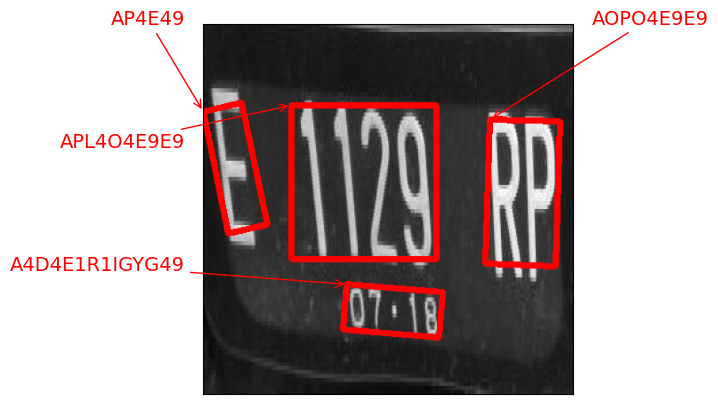

In [ ]:
keras_ocr.tools.drawAnnotations(plt.imread("/content/LicensePlateRecognition-main/dataset/platGray/E1129RP.jpg"),prediction_groups[0])

#### Keras-OCR tidak dapat mendekteksi plat dengan baik

# implementasi easy ocr

In [1]:
!pip install easyocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.0 MB/s eta 0:00:00


In [2]:
import easyocr

In [3]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
result = reader.readtext('/content/B2833XKX.jpg')

In [5]:
result

[([[10, 82], [38, 82], [38, 124], [10, 124]], 'B', 0.7203948715518254),
 ([[55, 79], [225, 79], [225, 143], [55, 143]],
  '2833 RKR',
  0.5936860142449986)]

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/B2833XKX.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(thresh, img_plate_bw) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

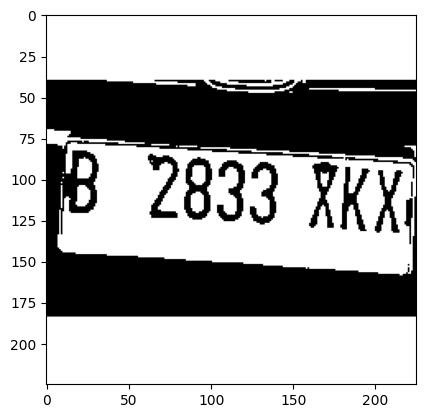

In [9]:
plt.imshow(img_plate_bw, cmap="gray")

In [10]:
cv2.imwrite("image_binnary.jpg", img_plate_bw)

True

In [11]:
result = reader.readtext('image_binnary.jpg')
result

[([[5, 76], [225, 76], [225, 141], [5, 141]],
  '8  2833 XKX}',
  0.16065264059611656)]

`Menggunakan easy ocr dengan melakukan binnry image dapat mendeteksi karakter tulsisan dengan baik`.
Coba dengan gambar yang lain

In [12]:
img = cv2.imread('/content/B3860NOB.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(thresh, img_plate_bw) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("image_binnary.jpg", img_plate_bw)
result = reader.readtext('image_binnary.jpg')
result

[([[0, 34], [26, 34], [26, 80], [0, 80]], '3', 0.19080957777115604),
 ([[51, 25], [186, 25], [186, 86], [51, 86]], '3860', 0.9992707371711731),
 ([[203, 25], [300, 25], [300, 85], [203, 85]], 'NBB', 0.8023071706402982),
 ([[151, 91], [295, 91], [295, 133], [151, 133]],
  '04 . 16',
  0.36510034816032233)]

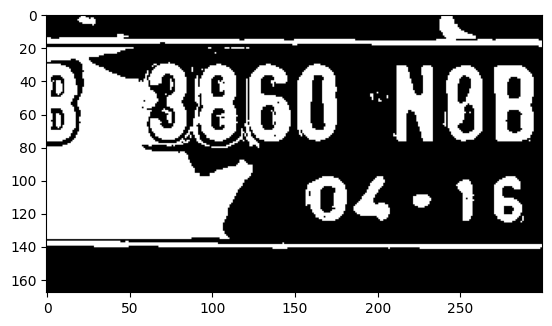

In [13]:
plt.imshow(img_plate_bw, cmap="gray")

In [17]:
img = cv2.imread('/content/E2101TJ.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(thresh, img_plate_bw) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("image_binnary.jpg", img_plate_bw)
result = reader.readtext('image_binnary.jpg')
result


[([[0, 44], [306, 44], [306, 255], [0, 255]], '[ Zu', 0.21789400555633973),
 ([[351, 65], [416, 65], [416, 189], [351, 189]], 'M', 0.2820075467616654),
 ([[354, 268], [410, 268], [410, 354], [354, 354]], '14', 0.5650593958359333)]

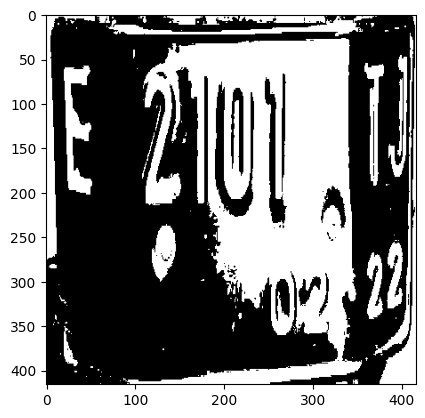

In [18]:
plt.imshow(img_plate_bw, cmap="gray")

In [19]:
img = cv2.imread('/content/E2344TK.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
(thresh, img_plate_bw) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("image_binnary.jpg", img_plate_bw)
result = reader.readtext('image_binnary.jpg')
result


[([[0, 30], [298, 30], [298, 182], [0, 182]], 'E 234L', 0.3708926879917086),
 ([[340, 48], [416, 48], [416, 176], [340, 176]], 'Tk', 0.5661377050494204),
 ([[228, 188], [416, 188], [416, 310], [228, 310]],
  '03.92',
  0.23687113562143383)]

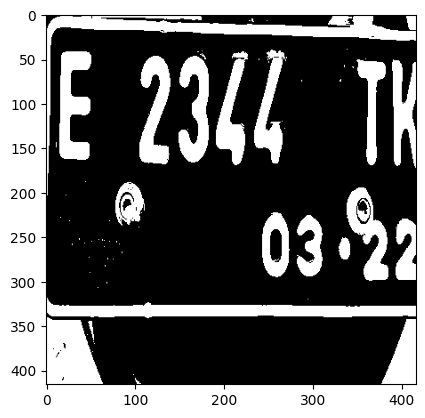

In [20]:
plt.imshow(img_plate_bw, cmap="gray")

Maka dari itu, saya menggunakan easy ocr

# Summary
Dari beberapa percobaan yang telah dilakukan. build model dengan data yang kurang tentu akan menghasilakan output yang tidak baik dikarenakan machine learning haus akan data. melakukan model machine learning dapat mengantisipasi data yang tidak clean.



Terdapat beberapa module rekognasi text dari gambar, akan tetapi hal ini membutuhkan gambar yang cukup clean. diantaranya:
* pytesseract
* easy-OCR
* keras-OCR
Dalam kasus ini, easy-OCR dapat mengatasi rekognasi karakter cukup baik.